<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2022S2/blob/main/mlp_penguins_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">


# Lab Multi Layer Perceptron

Neste exercício você vai empregar redes MLP do `scikit-learn` para resolver problemas de classificação e regressão sobre a base de dados `penguins`. Siga os passos e, a seguir, responda o questionário no Moodle.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dados

In [ ]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Dropna

Verifique e exclua os dados ausentes.

In [ ]:
df.shape

(344, 7)

In [ ]:
df.isnull().sum() 

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
df = df.dropna().reset_index(drop=True)
print(df.isnull().sum())
df.head()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Hot Encode

Faça o hot enconde de `species` empregando:

```
from sklearn.preprocessing import OneHotEncoder
```

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['species']])
transformed = hot_encode.transform(df[['species']]).toarray()
# print(transformed)

transformed_df = pd.DataFrame(transformed, columns=hot_encode.get_feature_names_out())
display(transformed_df.head())

df = pd.concat([df, transformed_df],axis=1) 
df.head()

,species_Adelie,species_Chinstrap,species_Gentoo
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0


# Label Encode

Faça o Label Encode de `sex` empregando a função `replace()` do `Pandas`. Atribua `1` para `Male` e `0` para `Female`. 

In [ ]:
df.sex = df.sex.replace('Male',1)
df.sex = df.sex.replace('Female',0)

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,1.0,0.0,0.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,1.0,0.0,0.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,1.0,0.0,0.0


# Normalização

Empregue:

```
from sklearn.preprocessing import MinMaxScaler
```

Para fazer a normalização dos dados:

```
['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'sex']
```

Não empregaremos `body_mass_g` nem `island` que são atributos objetivo das seções seguintes. O nome dos atributos ainda pode diferir de acordo com as transformações anteriores que você fez.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Entradas e Saídas
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'sex']]
y = df['island']

columns = X.columns

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
pd.DataFrame(X, columns = columns)

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,sex
0,0.254545,0.666667,0.152542,1.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,1.0,0.0,0.0,0.0
2,0.298182,0.583333,0.389831,1.0,0.0,0.0,0.0
3,0.167273,0.738095,0.355932,1.0,0.0,0.0,0.0
4,0.261818,0.892857,0.305085,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.0,0.0,1.0,0.0
329,0.534545,0.142857,0.728814,0.0,0.0,1.0,0.0
330,0.665455,0.309524,0.847458,0.0,0.0,1.0,1.0
331,0.476364,0.202381,0.677966,0.0,0.0,1.0,0.0


In [ ]:
X.sum()

969.6452916574951

# Classificação

Empregue os atributos normalizados da seção anterior como variáveis preditoras para implemente um algoritmo MLP para classificação da ilha (`island`) de origem dos pinguins. 

1. Train/Test Split. Empregue 25% dos dados para teste, `random_state=1` e dados estratificados pelo atributo classe (variável objetivo).
2. MLP. Empregue `random_state=1`, uma rede com camadas ocultas de 8, 16 e 8 neurônios respectivamente e número máximo de iterações 1000.

Não empregue outros parâmetros além dos solicitados. 

Ao final produza um `classification report`  e a matriz de confusão para responder as questões. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Separação Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Definição
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(8,16,8), max_iter=1000)

# Treinamento
clf.fit(X_train, y_train)

# Avaliação
y_pred = clf.predict(X_test)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

      Biscoe       0.97      0.78      0.86        41
       Dream       0.64      0.94      0.76        31
   Torgersen       0.50      0.25      0.33        12

    accuracy                           0.76        84
   macro avg       0.70      0.66      0.65        84
weighted avg       0.78      0.76      0.75        84


Confusion Matrix:

[[32  8  1]
 [ 0 29  2]
 [ 1  8  3]]


# Non-Linear Regression

Empregue os atributos normalizados da seção anterior como variáveis preditoras para implemente um algoritmo MLP para estimar o valor de `body_mass_g` (você não vai empregar o atributo `island` aqui). 

1. Train/Test Split. Empregue 25% dos dados para teste, `random_state=1` (para regressão não empregue dados estratificados).
2. MLP. Empregue `random_state=1`, uma rede com camadas ocultas de 8, 16 e 8 neurônios respectivamente e número máximo de iterações 2000.

Não empregue outros parâmetros além dos solicitados. 

Ao final obtenha o score do modelo obtido. 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



Score:

0.87


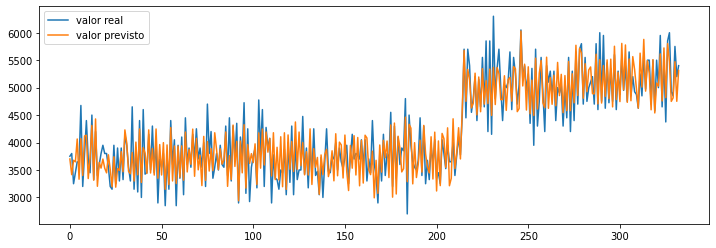

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Entradas e Saídas
y = df['body_mass_g']

# Separação Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Definição
reg = MLPRegressor(random_state=1, hidden_layer_sizes=(8,16,8), max_iter=2000)

# Treinamento
reg.fit(X,y)

# Avaliação
y_pred = reg.predict(X)

score = reg.score(X, y)
print('\nScore:\n')
print(f'{score:.2f}')

fig = plt.figure(figsize=(12,4))

plt.plot(df['body_mass_g'],label='valor real')
plt.plot(y_pred,label='valor previsto')

plt.legend()
plt.show()



# Predição

Empregue os modelos anteriores para fazer a predição de um pinguim modelo da espécie `Gentoo` do sexo masculino. Os demais valores são os valores médios da coleção toda. Faça a predição tanto da ilha de origem como do peso do pinguim modelo.

In [ ]:
df_new = pd.DataFrame()

df_new['bill_length_mm'] = [df['bill_length_mm'].mean()]
df_new['bill_depth_mm'] = df['bill_depth_mm'].mean()
df_new['flipper_length_mm'] = df['flipper_length_mm'].mean()
df_new['species_Adelie'] = 0
df_new['species_Chinstrap'] = 0 
df_new['species_Gentoo'] = 1 
df_new['sex'] = 1

df_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,sex
0,43.992793,17.164865,200.966967,0,0,1,1


In [ ]:
df_new.sum().sum()

264.12462462462463

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Entradas e Saídas
X_new = df_new[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'sex']]

X_new = scaler.transform(X_new)

print(X_new)

clf.predict(X_new)

[[0.43246519 0.48391248 0.49096554 0.         0.         1.
  1.        ]]


array(['Biscoe'], dtype='<U9')

In [ ]:
# Entradas e Saídas
X_new = df_new[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'sex']]

X_new = scaler.transform(X_new)

print(X_new)

reg.predict(X_new)

[[0.43246519 0.48391248 0.49096554 0.         0.         1.
  1.        ]]


array([4987.97276221])

# Experimente os Modelos Neurais

Explore diferentes configurações da rede neural para classificação, por exemplo, aumentando e diminuindo camadas e elementos das camadas.



In [ ]:
y = df['island']

# Separação Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Definição
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(32,64,32), max_iter=1000)

# Treinamento
clf.fit(X_train, y_train)

# Avaliação
y_pred = clf.predict(X_test)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

      Biscoe       0.91      0.76      0.83        41
       Dream       0.61      0.81      0.69        31
   Torgersen       0.22      0.17      0.19        12

    accuracy                           0.69        84
   macro avg       0.58      0.58      0.57        84
weighted avg       0.70      0.69      0.69        84



In [ ]:
y = df['island']

# Separação Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Definição
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(16,16), max_iter=1000)

# Treinamento
clf.fit(X_train, y_train)

# Avaliação
y_pred = clf.predict(X_test)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

      Biscoe       0.94      0.78      0.85        41
       Dream       0.64      0.90      0.75        31
   Torgersen       0.17      0.08      0.11        12

    accuracy                           0.73        84
   macro avg       0.58      0.59      0.57        84
weighted avg       0.72      0.73      0.71        84

